<h1 style='text-align:center'>Titanic Survival Prediction</h1>

<div class='alert alert-block alert-info' style="color:black">
<h3><b><i>This Project explores the tragic sinking of the RMS Titanic in 1912 through the lens of machine learning. We'll delve into the passenger data, uncovering patterns and relationships between various factors like passenger class, gender, age, and travel arrangements, and their potential influence on survival rates. By building a Support Vector Machine (SVC) model and a Logistic regression Model, we aim to predict survival outcomes based on these features, gaining insights into the factors that may have played a role in this historical disaster. Explore the notebook to discover new insights.
</div>    

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Titanic_Portside_Diagram.jpg)

## For Kaggle Dataset : [Click here](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

### Importing Libraries
We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Titanic-Dataset CodSoft.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Performing Exploratory Data Analysis

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.Survived.value_counts()/len(df)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [10]:
df1=df[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]]

In [11]:
df1_encoded = pd.get_dummies(df[["Sex","Embarked"]])
df1 = pd.concat([df1, df1_encoded], axis=1)

In [12]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [13]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359


## Performing Data Visualization

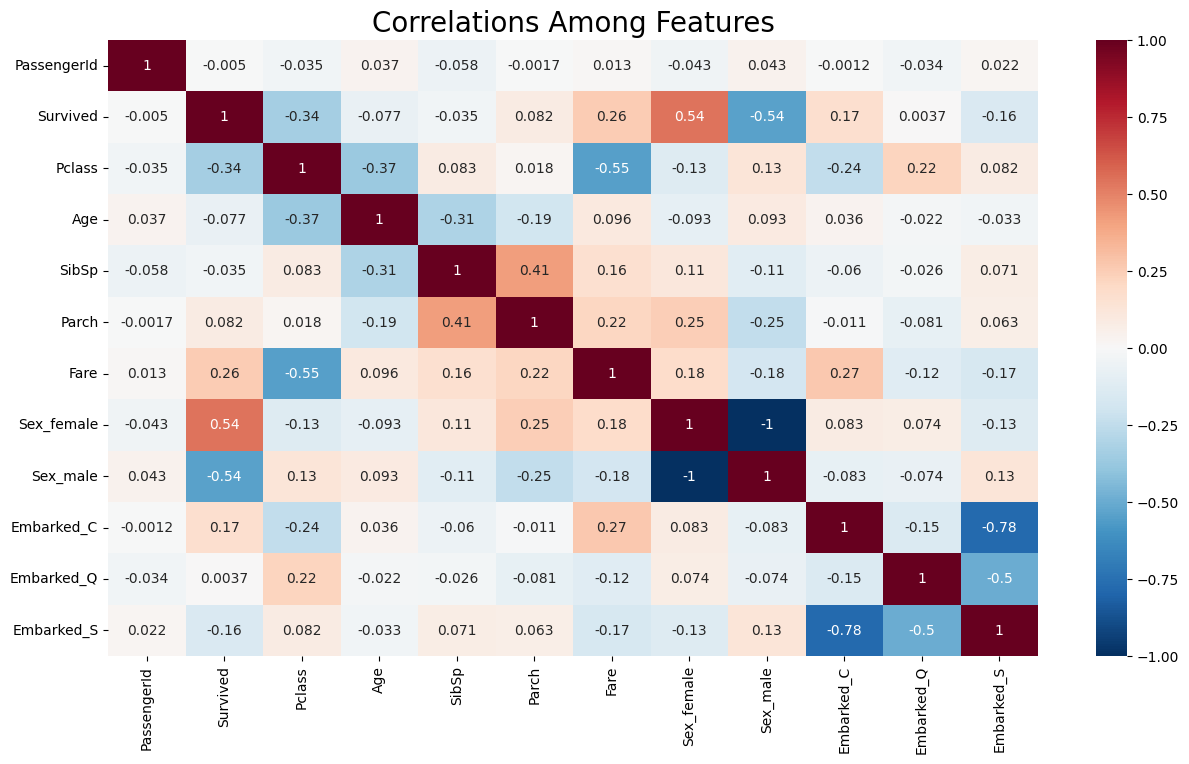

In [14]:
plt.subplots(figsize = (15,8))
sns.heatmap(df1.corr(), annot=True,cmap="RdBu_r")
plt.title("Correlations Among Features", fontsize = 20);

> There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.

>There is a negative correlation between Fare and Pclass. This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).

In [15]:
df[ (df['Sex']=='male') & (df['Survived']==1) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


Let's visualize it by bar chart

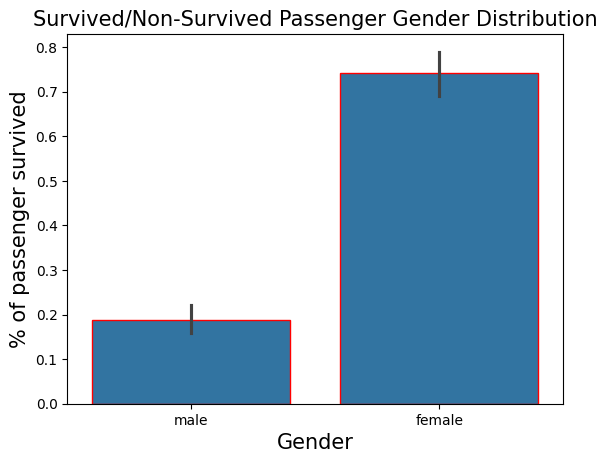

In [16]:
sns.barplot(x="Sex",y="Survived",data=df,edgecolor='Red')
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.show()

In [17]:
df.Survived.value_counts()/len(df)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

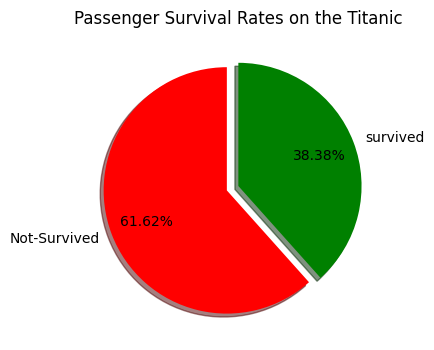

In [18]:
plt.subplots(figsize=(4,4))
(df.Survived.value_counts()/len(df)*100).plot(kind='pie',labels=['Not-Survived','survived'],autopct='%1.2f%%',startangle=90,shadow=True,explode=[0.1,0],pctdistance=0.7,colors=['red','green'])
plt.ylabel('')
plt.title("Passenger Survival Rates on the Titanic")
plt.show()

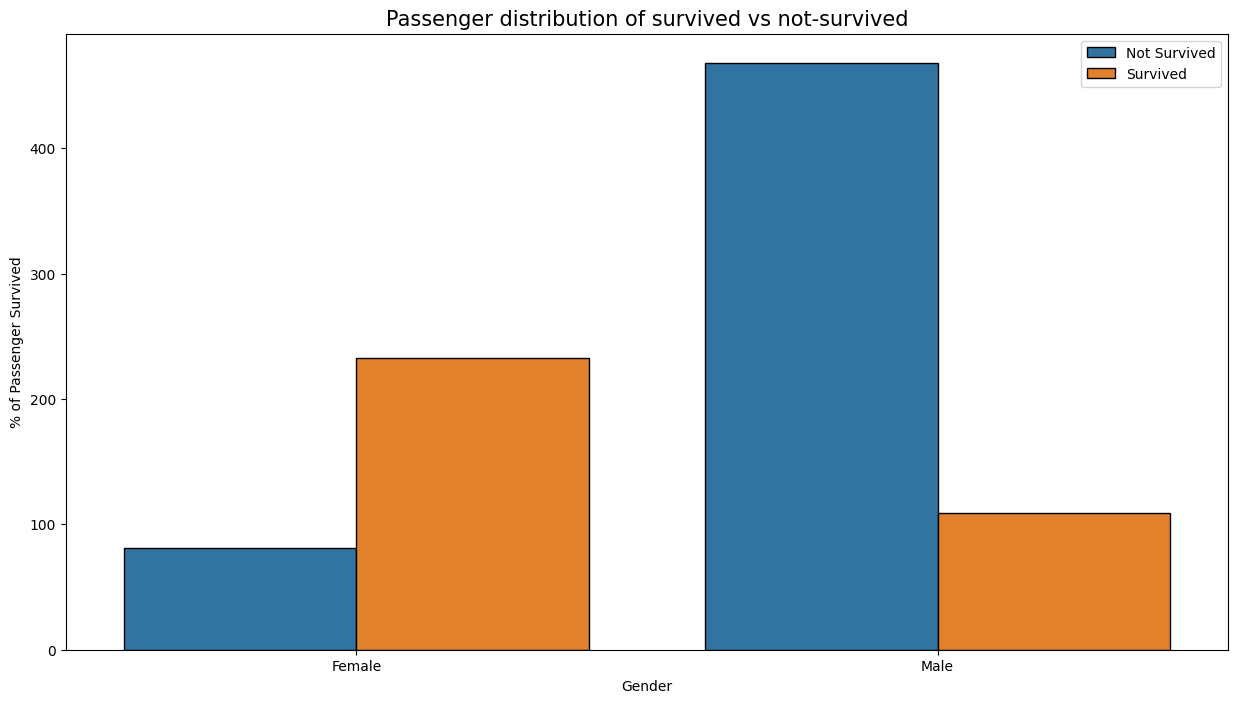

In [19]:
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=df1,hue='Survived',edgecolor='Black')
plt.title('Passenger distribution of survived vs not-survived',fontsize=15)
plt.xlabel('Gender',fontsize=10)
plt.ylabel("% of Passenger Survived", fontsize = 10)
labels = ['Female', 'Male']
plt.xticks(df1.Survived.unique(),labels)
plt.legend(["Not Survived","Survived"])
plt.show()

As we suspected, female passengers have survived at a much better rate than male passengers

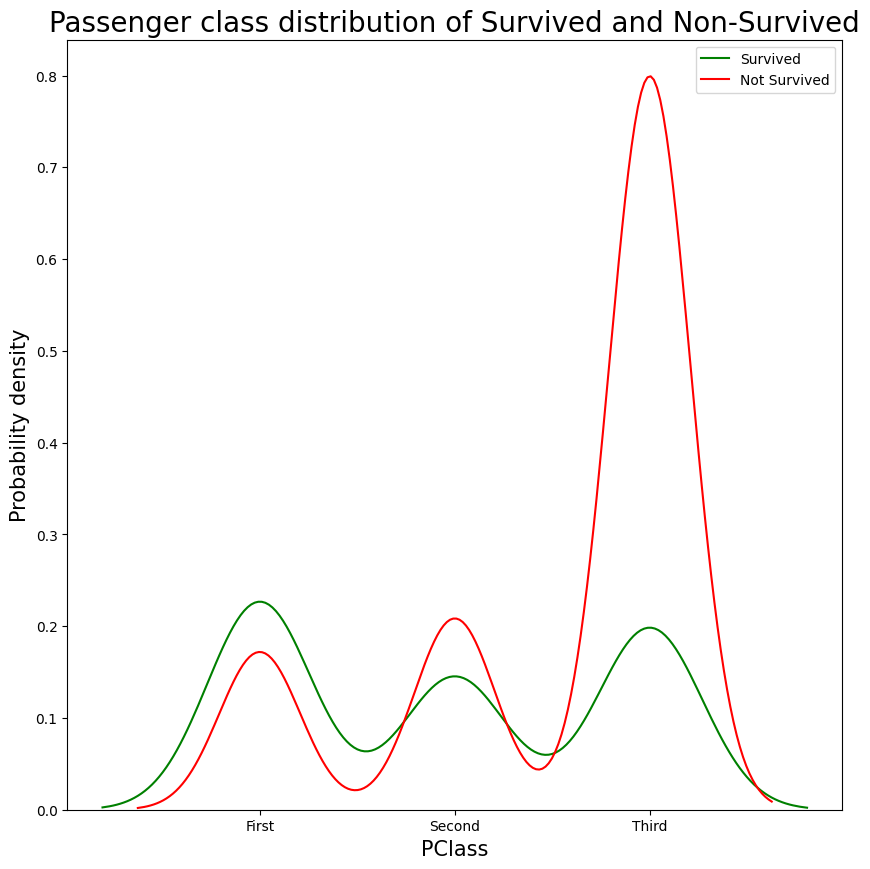

In [20]:
plt.subplots(figsize=(10,10))
colors=["Red","Green"]
sns.kdeplot(x="Pclass",hue="Survived",data=df,palette=colors)
plt.ylabel("Probability density",fontsize=15)
plt.xlabel("PClass",fontsize=15)
plt.legend(["Survived","Not Survived"])
plt.title("Passenger class distribution of Survived and Non-Survived",fontsize=20)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)
plt.show()

> The survival of the people belong to 3rd class is least. And the survival of the people belong to 1st class is most.

> This kde plot is explanatory with all the labels and colors. Sometimes some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second which may be due to financial conditions.

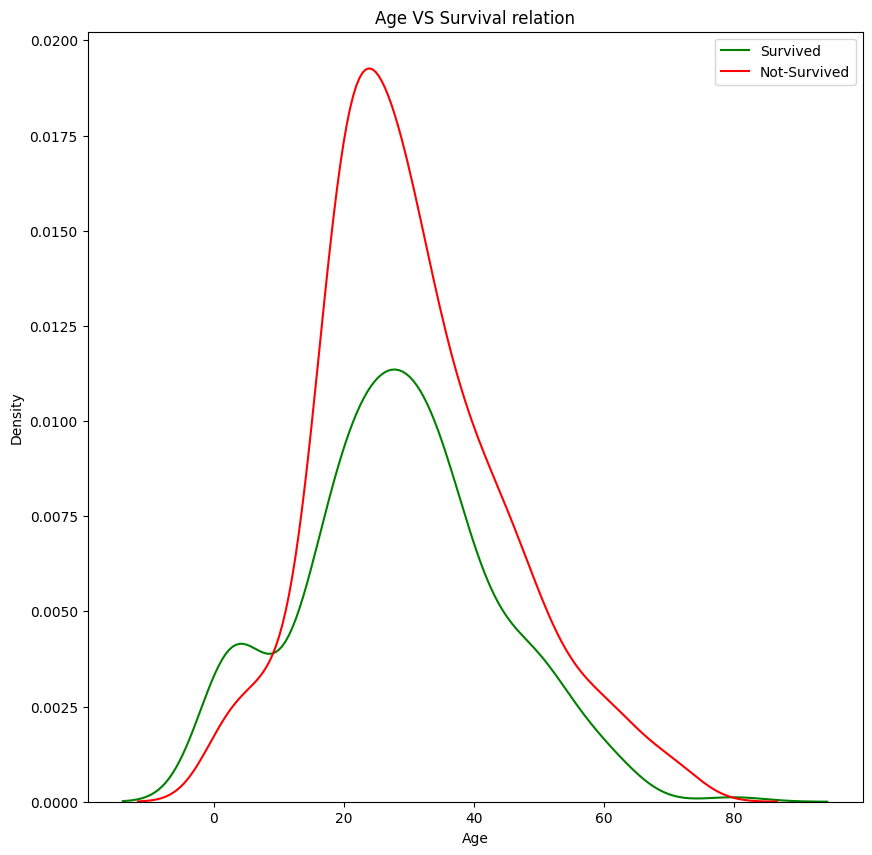

In [21]:
plt.subplots(figsize=(10,10))
sns.kdeplot(x="Age",hue='Survived',data=df,palette=colors)
plt.title('Age VS Survival relation')
plt.legend(["Survived","Not-Survived"])
plt.show()

> The left part and right of the kdeplot shows that children, infants and senior citizens were the priority.

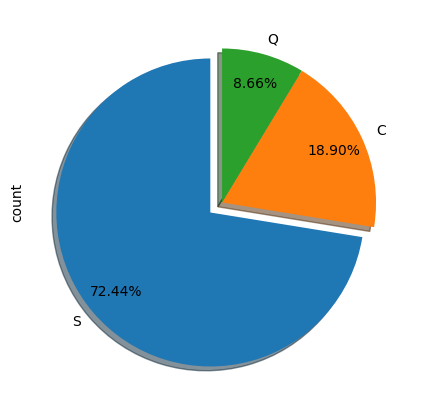

In [22]:
plt.subplots(figsize=(5,5))
labels=['S','C','Q']
df[["Embarked"]].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,shadow=True,explode=[0.1,0,0],pctdistance=0.80,labels=labels)
plt.show()

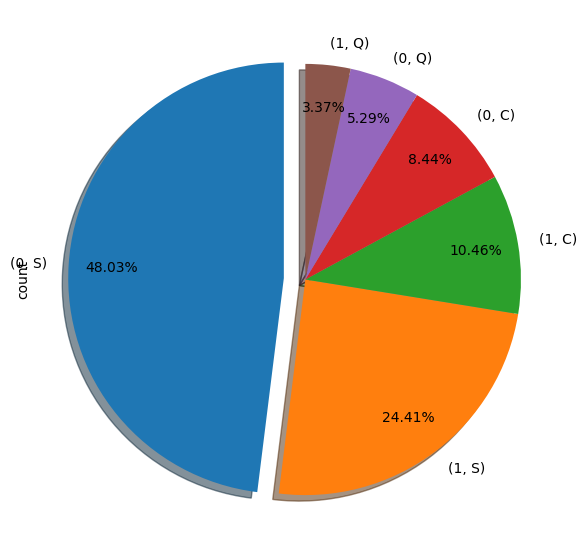

In [23]:
plt.subplots(figsize=(7,7))
df[["Survived","Embarked"]].value_counts().plot(kind='pie',startangle=90,shadow=True,autopct='%1.2f%%',pctdistance=0.80,explode=[0.1,0,0,0,0,0])
plt.show()

## Predictive Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression

In [25]:
df2=df1.replace({True:1,False:0})
df2=df2.drop('SibSp',axis=1)
df2.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,8.0500,0,1,0,0,1


In [26]:
mean_fare=df['Fare'].mean()
df2['Fare']=df2['Fare'].replace(np.nan,mean_fare)

In [27]:
df2.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,8.0500,0,1,0,0,1


In [28]:
X=df2[['Pclass','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
Y=df2['Survived']

### Splitting the dataset into training and testing 

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

> #### We found that SVM, Logistic Regression, Decision Trees are the best for this prediction. So I choose to go with Support Vector Machine.

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(712, 8)
(712,)
(179, 8)
(179,)


In [32]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [33]:
print(X_scaled.shape)

(712, 8)


In [34]:
svc_model = SVC()
param_grid = {'C': [0.01, 0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': [0.01,0.1, 1, 10]}

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=10)

In [35]:
grid_search.fit(X_scaled, Y_train)

print("The Best parameters is = ", grid_search.best_params_)
print("The Best cross-validation score is = ", grid_search.best_score_)


The Best parameters is =  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
The Best cross-validation score is =  0.8103286384976526


In [36]:
# Getting the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Making predictions on the original data
predictions = best_svm_model.predict(X_test)




C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [37]:
predictions.shape

(179,)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy score = ", accuracy)

Accuracy score =  0.664804469273743


> ### The accuracy of the model is bit low. Let's use the learning_curve to check if the model is underfitted 

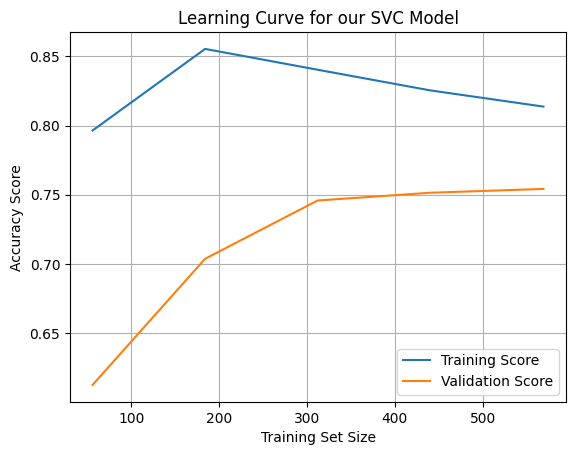

In [39]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator=best_svm_model, X=X_train, y=Y_train, cv=5, scoring='accuracy')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation Score')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.title('Learning Curve for our SVC Model')
plt.legend()
plt.grid(True)
plt.show()

> #### The above Learning_Curve shows that the SVC model is not underfitted and is performing a bit low due to other reasons!

> ### Let's develop a Logistic Regression model and compare it's accuracy

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression(max_iter=2000)

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.01,0.1,1,10],'solver':['lbfgs']}
grid_search=GridSearchCV(lr,param_grid=param_grid,cv=10,scoring='accuracy')
grid_search.fit(X_train,Y_train)
print("Best hyperparameters are : ",grid_search.best_params_)
print("Best cross-validation score : ",grid_search.best_score_)

Best hyperparameters are :  {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score :  0.7807707355242566


In [43]:
best_model=grid_search.best_estimator_
yhat2=best_model.predict(X_test)

#### Let's compare the actual and predicted vales

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("The accuracy of the Logistic Regression model is ",accuracy_score(yhat2,Y_test))

The accuracy of the Logistic Regression model is  0.7988826815642458


#### Let's compare the actual and predicted vales for both models using kdeplot

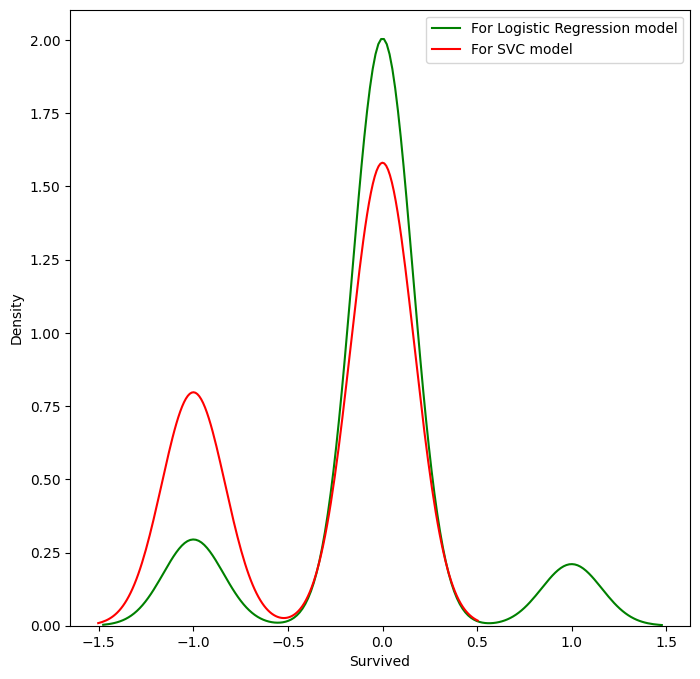

In [46]:
plt.figure(figsize=(8,8))
ax=sns.kdeplot(yhat2-Y_test,color="green")
sns.kdeplot(predictions-Y_test,color="red")
plt.legend(['For Logistic Regression model','For SVC model'],loc='upper right')
plt.show()

### Let's create a DataFrame that contains actual test values and predicted values by both models

In [47]:
prediction_df=pd.DataFrame({'Actual val':Y_test,'Prediction by SVC':predictions,'Prediction by Logistic Reg':yhat2})

In [48]:
prediction_df

,Actual val,Prediction by SVC,Prediction by Logistic Reg
646,0,0,0
876,0,0,0
359,1,0,1
194,1,0,1
819,0,0,0
...,...,...,...
568,0,0,0
254,0,0,1
406,0,0,0
710,1,0,1


> #### We can see that the Logistic regression model is performing more decently than the SVC model!

## Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)